## Homework - Machine Learning Preparation
### Agi Rahmawandi <br> Batch 57



In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.2.5
pandas version :  2.2.3
seaborn version :  0.13.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


### Load data

In [3]:
df = pd.read_csv('./dataset/Product_Exclusive_Classification.csv')

## Exploratory Data Analysis (EDA)

## Pendekatan Numerik
## 1. Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?<br>
(min/mean/median/max/unique/top/freq)<br>
* Untuk masing-masing jenis observasi, tuliskan juga

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [5]:
## pengelompokan berdasar jenis kolom
obj = ['brand','category']
numbs = ['rating','number_of_reviews','love','price','value_price']

In [6]:
df[obj].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


In [6]:
df[numbs].describe()

,rating,number_of_reviews,love,price,value_price
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000


In [7]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [8]:
df.sample(3)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
1178,1589118,Fresh,Moisturizers,4.0,NaN,11900.0,90.0,90.0,0
5641,2162493,dyson,Hair Straighteners & Flat Irons,4.0,496.0,50400.0,549.0,549.0,0
551,1284249,Armani Beauty,Perfume,4.5,921.0,30300.0,78.0,78.0,0


A. Type data dan nama kolom sudah sesuai <br>
B. kolom yang memiliki nilai kosong adalah category,rating, number_of_reviews,love,price,value_price<br>
C. dikolom number_of_reviews nilai mean dan median terlihat cukup jauh perbedaan nya **mean 303.57**, **median 56** serta rentang **standar deviasinya** cukup jauh dari mean nya yakni **931.7**

https://www.kaggle.com/code/mohammadfikri/product-exclusive-classification-roc-auc-87/notebook

## Pendekatan Grafis

## 2. Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). <br>Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).<br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

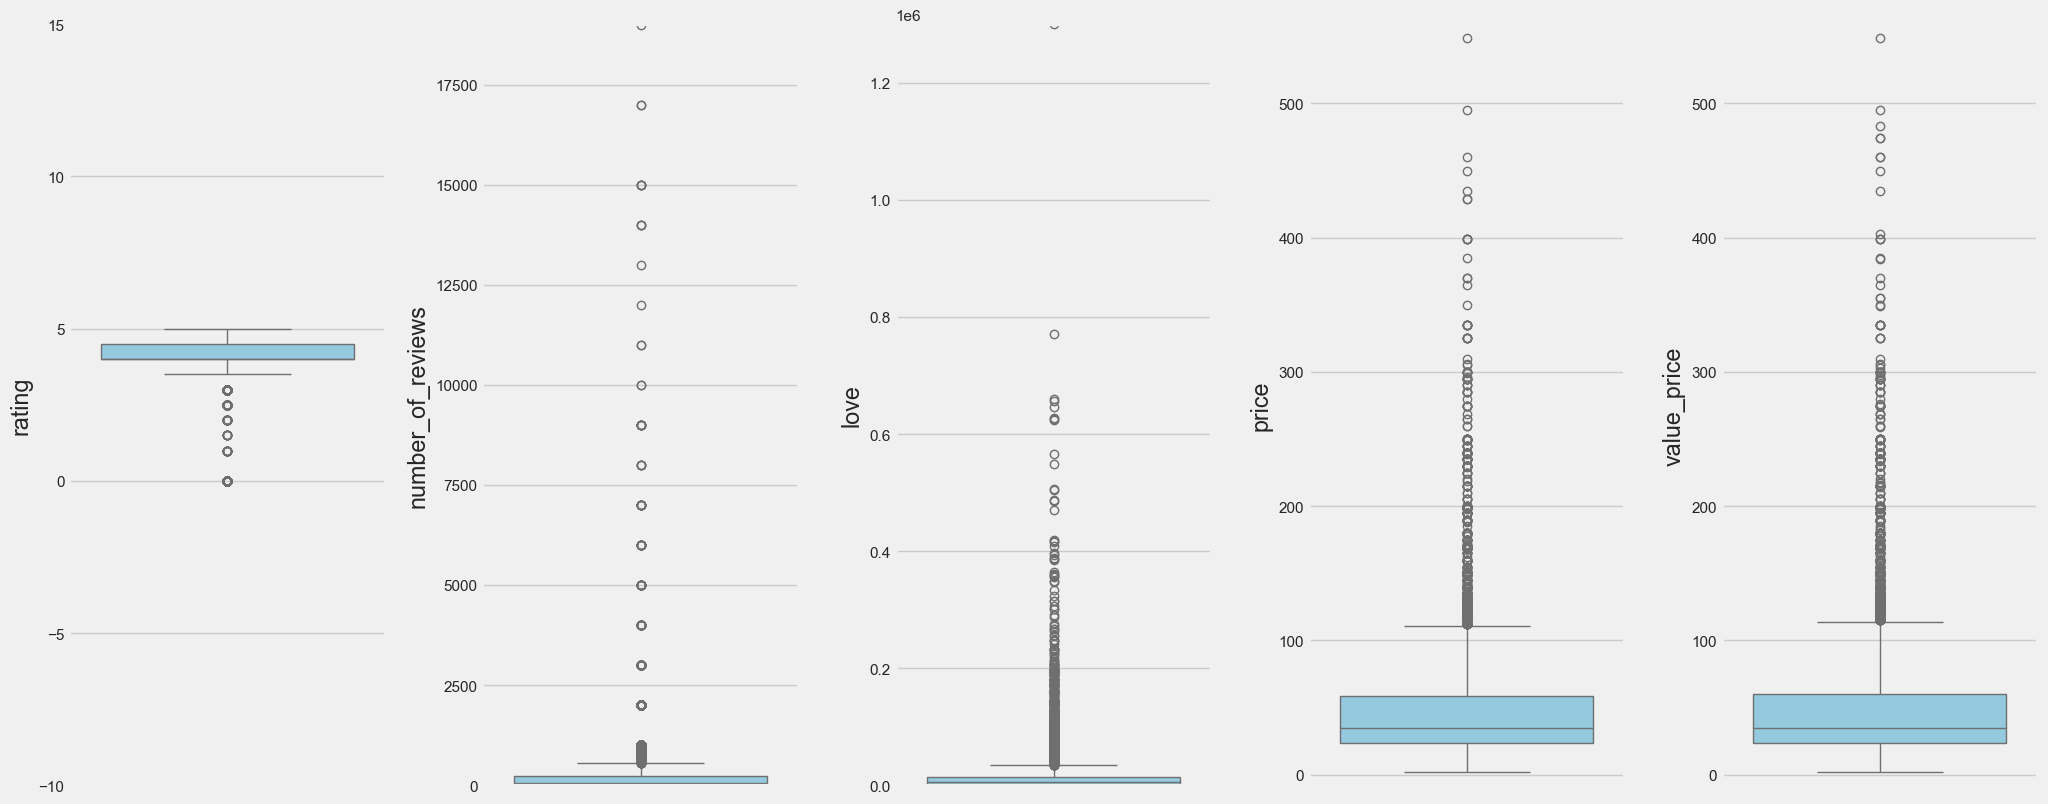

In [10]:
for i in range(len(numbs)):
    plt.subplot(1, len(numbs), i + 1)
    sns.boxplot(y=df[numbs[i]], color='skyblue')
    col_min = df[numbs[i]].min()
    col_max = df[numbs[i]].max()
    plt.ylim(col_min - 10, col_max + 10)

plt.tight_layout()
plt.show()

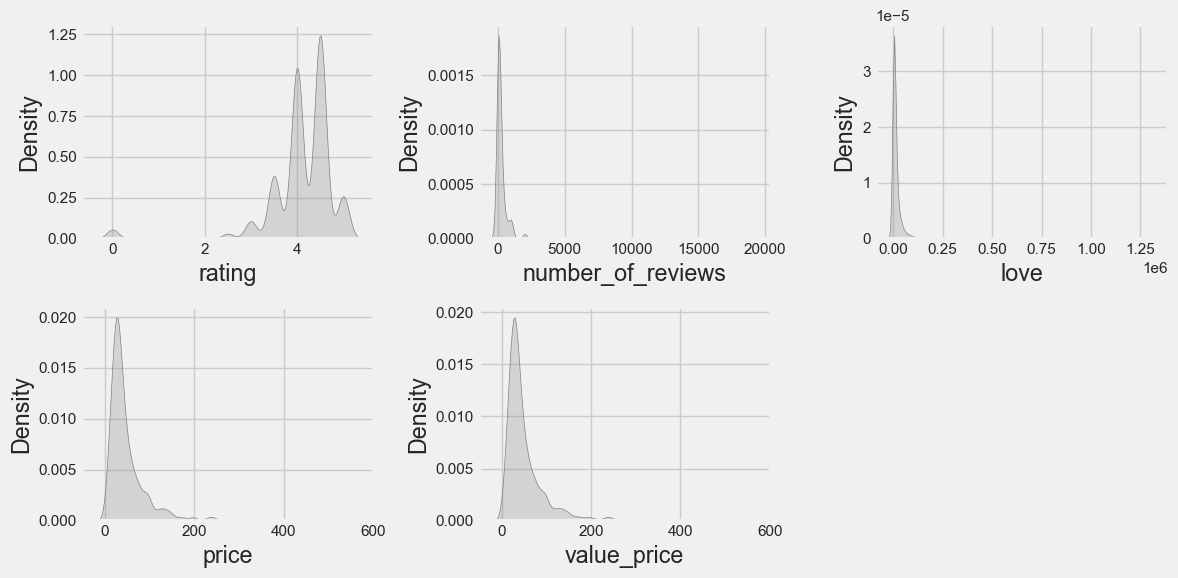

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Flatten axes agar mudah diakses dengan index
axes = axes.flatten()

# Plot tiap kolom secara terpisah
for i, col in enumerate(numbs):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='gray')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Nonaktifkan axes yang tidak terpakai (jika kolom < jumlah subplot)
for j in range(len(numbs), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Multivariate Analysis (15 poin)
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?<br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

<Axes: >

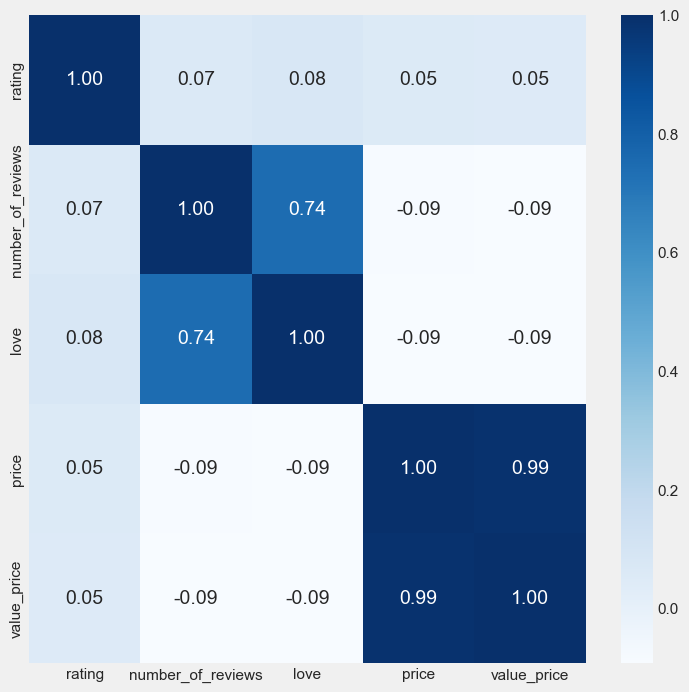

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[numbs].corr(), cmap='Blues', annot=True, fmt='.2f')

## Insight (20 Poin)

Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

## 4. Data Cleansing (40 poin)
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:<br>
A. Handle missing values<br>
B. Handle duplicate data<br>
C. Handle outliers<br>
D. Feature transformation<br>
E. Feature encoding<br>
F. Handle class imbalance<br>
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.<br>
* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan
fokus menggunakan model yang robust terhadap outlier”).

### A. Missing Value 

In [13]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
6739,2221588,Acqua Di Parma,Body Mist & Hair Mist,4.0,5.0,800.0,58.0,58.0,0
5041,2111938,PAT McGRATH LABS,Eye Palettes,4.5,411.0,64800.0,125.0,125.0,1
4728,2082006,Coal and Canary,Candles & Home Scents,2.5,7.0,307.0,28.0,28.0,1
4920,2101475,Kilian,Rollerballs & Travel Size,3.5,21.0,1200.0,30.0,30.0,0
562,1287580,Bobbi Brown,Lipstick,4.5,503.0,44900.0,29.0,29.0,0


In [16]:
df.isna().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

In [15]:
df['category'].fillna(df['category'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['number_of_reviews'].fillna(df['number_of_reviews'].mode()[0],inplace=True)
df['love'].fillna(df['love'].mode()[0],inplace=True)
df['price'].fillna(df['price'].mean(),inplace=True)
df['value_price'] = df['value_price'].fillna(df['price'])

### B. Duplicate Values 


In [17]:
df.duplicated().sum()

np.int64(0)

### C. Outliers 

In [18]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in numbs:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 8000
Jumlah baris setelah memfilter outlier: 5549


In [19]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 5549 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5549 non-null   int64  
 1   brand              5549 non-null   object 
 2   category           5549 non-null   object 
 3   rating             5549 non-null   float64
 4   number_of_reviews  5549 non-null   float64
 5   love               5549 non-null   float64
 6   price              5549 non-null   float64
 7   value_price        5549 non-null   float64
 8   exclusive          5549 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 433.5+ KB


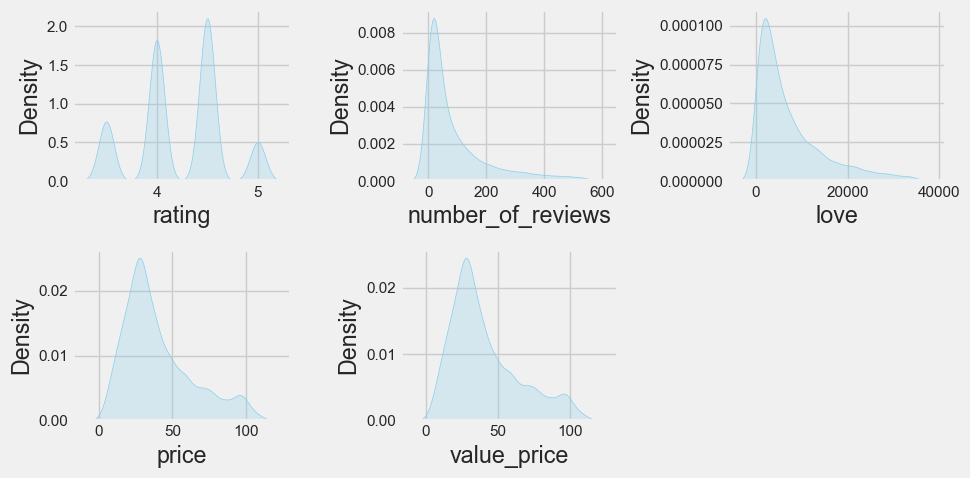

In [27]:
# Buat subplot: 1 kolom 5 baris (bisa disesuaikan)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

# Flatten axes agar mudah diakses dengan index
axes = axes.flatten()

# Plot tiap kolom secara terpisah
for i, col in enumerate(numbs):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Nonaktifkan axes yang tidak terpakai (jika kolom < jumlah subplot)
for j in range(len(numbs), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### D.Feature transformation


In [28]:
df['number_of_reviews_std'] = StandardScaler().fit_transform(df['number_of_reviews'].values.reshape(len(df), 1))
df['love_std'] = StandardScaler().fit_transform(df['love'].values.reshape(len(df), 1))
df['price_std'] = StandardScaler().fit_transform(df['price'].values.reshape(len(df), 1))
df['value_price_std'] = StandardScaler().fit_transform(df['value_price'].values.reshape(len(df), 1))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5549 entries, 0 to 7998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5549 non-null   int64  
 1   brand                  5549 non-null   object 
 2   category               5549 non-null   object 
 3   rating                 5549 non-null   float64
 4   number_of_reviews      5549 non-null   float64
 5   love                   5549 non-null   float64
 6   price                  5549 non-null   float64
 7   value_price            5549 non-null   float64
 8   exclusive              5549 non-null   int64  
 9   number_of_reviews_std  5549 non-null   float64
 10  love_std               5549 non-null   float64
 11  price_std              5549 non-null   float64
 12  value_price_std        5549 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 606.9+ KB


### E. Feature encoding

In [30]:
df['brand_encoded'] = df.groupby('brand')['exclusive'].transform('mean')
df['category_encoded'] = df.groupby('category')['exclusive'].transform('mean')

In [31]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,number_of_reviews_std,love_std,price_std,value_price_std,brand_encoded,category_encoded
4567,2071207,STELLAR,Lipstick,4.0,24.0,5700.0,24.0,24.0,1,-0.585485,-0.217067,-0.686071,-0.701071,0.615385,0.247191
3645,1989284,Kiehl's Since 1851,Moisturizers,3.5,20.0,1000.0,25.0,25.0,0,-0.619316,-0.847212,-0.643826,-0.659724,0.038095,0.239852
1012,1536200,MAKE UP FOR EVER,Face Brushes,4.5,48.0,7100.0,48.0,48.0,1,-0.382496,-0.029364,0.327804,0.291254,1.000000,0.489796
6187,2193175,rms beauty,Cheek Palettes,4.0,18.0,2900.0,32.0,32.0,0,-0.636232,-0.592473,-0.348113,-0.370296,0.000000,0.217391
4391,2057644,Kiehl's Since 1851,Mini Size,4.5,45.0,5700.0,16.0,16.0,0,-0.407870,-0.217067,-1.024029,-1.031846,0.038095,0.121622


Tujuan penggunaan Target Encoding :<br>

High cardinality,dalam kolom banyak kategori dan tidak cocok untuk One-Hot karena akan menghasilkan banyak kolom.<br>
memiliki target biner (exclusive), sehingga:<br><br>
`encoded_brand = mean(exclusive∣brand)`<br>
`encoded_category =mean(exclusive∣category)`<br><br>


Artinya, tiap brand akan diganti dengan rata-rata nilai exclusive pada produk-produk brand tersebut.

### F. Handle class imbalance

In [32]:
df['exclusive'].value_counts(normalize=True)  # proporsi
df['exclusive'].value_counts()  

exclusive
0    4106
1    1443
Name: count, dtype: int64

# 5. Feature Engineering (30 poin)
Cek feature yang ada sekarang, lalu lakukan:<br>
A. Feature selection (membuang feature yang kurang relevan atau redundan)<br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada)<br>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya
dan tidak perlu diimplementasikan)<br>
* Untuk 5A & 5B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)<br>

### A. Feature selection

In [34]:
# Hitung korelasi semua kolom terhadap 'exclusive'
corr_matrix = df.corr(numeric_only=True)

# Ambil korelasi fitur terhadap target
feature_corr = corr_matrix['exclusive'].drop('exclusive').sort_values(ascending=False)

print(feature_corr)

brand_encoded            0.809607
category_encoded         0.373227
id                       0.223768
love                     0.091636
love_std                 0.091636
rating                   0.007721
number_of_reviews_std   -0.020810
number_of_reviews       -0.020810
value_price             -0.183253
value_price_std         -0.183253
price_std               -0.202203
price                   -0.202203
Name: exclusive, dtype: float64


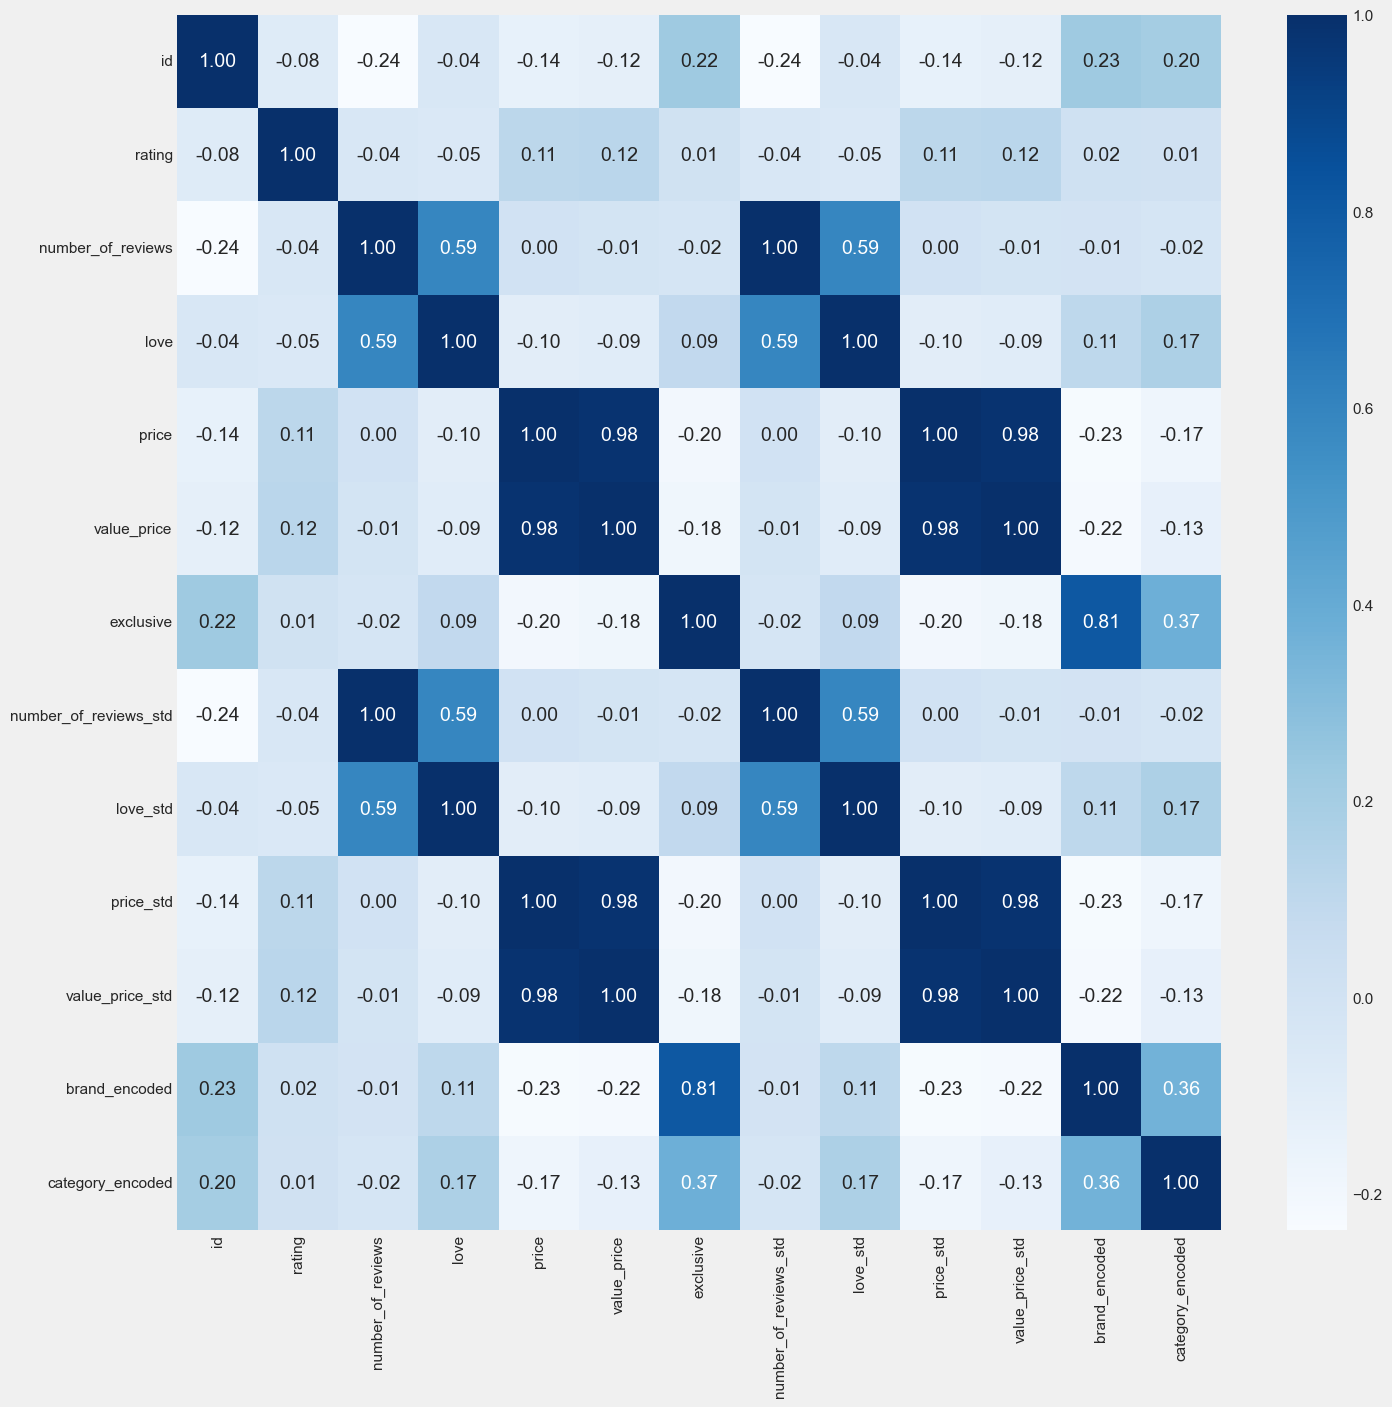

In [35]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### B. Feature extraction

### C. feature tambahan